# Introduction to Data Visualisation (Demonstration)

_This notebook introduces basic concepts around data visualisation using Python._

Note: This Jupyter Notebook was originally compiled by Alex Reppel (AR) based on conversations with [ClaudeAI](https://claude.ai/) *(version 3.5 Sonnet)*. For this year's materials, further revisions were made using [Claude Code](https://www.anthropic.com/claude-code) *(Sonnet 4.5)*, including updated documentation and git commit messages.

## Introduction

We'll use actual business data to learn how to create effective visualisations using Python's most popular libraries:

- **pandas**: For data manipulation and basic plotting
- **matplotlib**: For customisable plots
- **seaborn**: For statistical visualisations

We'll work with a business metrics dataset containing daily performance indicators from an *(made up)* e-commerce company.

## Setup

First, let's import the libraries we need and load our data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Style

In [2]:
# Set the style for all our plots
plt.style.use('classic')

Above, we use the `classic` matplotlib style. Other valid options include:

1. "default"
2. "bmh"
3. "fivethirtyeight"
4. "ggplot"
5. "grayscale"

You can see all available styles by running:

In [3]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Load dataset

In [4]:
# Load our business metrics data
df = pd.read_csv('assets/data/week07/data.csv')

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [5]:
# Display the first few rows
df.head()

,date,visitors,marketing_spend,conversion_rate,avg_order_value,revenue,satisfaction
0,2023-06-01,1049,517.89,0.0195,53.78,1101.04,4.36
1,2023-06-02,1234,528.04,0.0226,48.94,1361.81,3.93
2,2023-06-03,1414,554.15,0.0245,59.65,2065.86,3.92
3,2023-06-04,1356,552.69,0.0246,59.24,1977.15,3.85
4,2023-06-05,896,431.12,0.0225,49.81,1004.85,4.20


***
## 🎯 CORE CONTENT (Essential for Exercises)

**Estimated time**: 50-60 minutes

This section covers the fundamental visualisation techniques you'll need for this week's exercises and your individual project.

***

## Basic plotting with Pandas

Pandas provides built-in plotting capabilities that are perfect for quick visualisations.

### Example 1: Website visitors

Let's start by examining our website visitors over time:

In [6]:
# Set the date as index for time series plotting
# IMPORTANT: This only works once! (run cells above to load the dataset again if you wish to run it again.)
df.set_index('date', inplace=True)

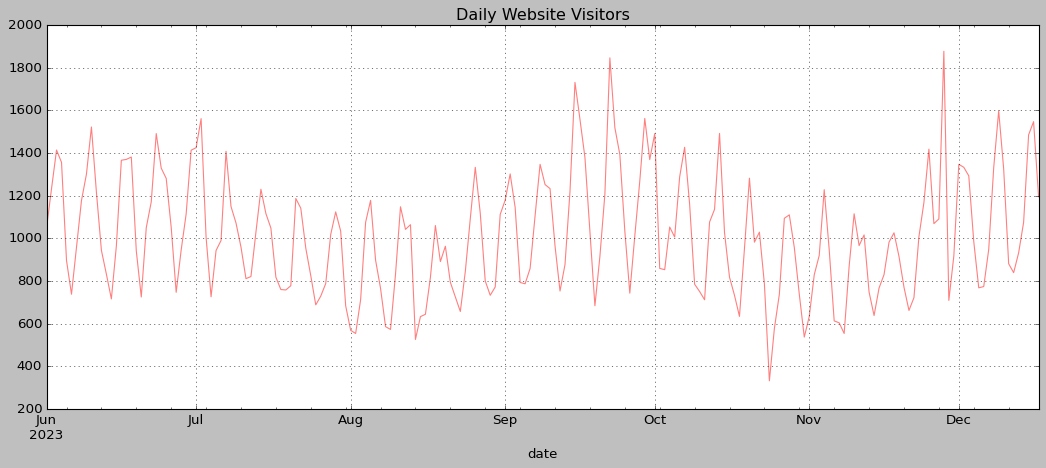

In [7]:
# Create a line plot of daily visitors
plt.figure(figsize=(16, 6))

df['visitors'].plot(
    title="Daily Website Visitors", 
    color='red', 
    alpha=0.5)

plt.grid(True, alpha=1)

plt.show()

### Example 2: Understanding marketing impact

Now, we'll examine how marketing spend relates to our conversion rate:

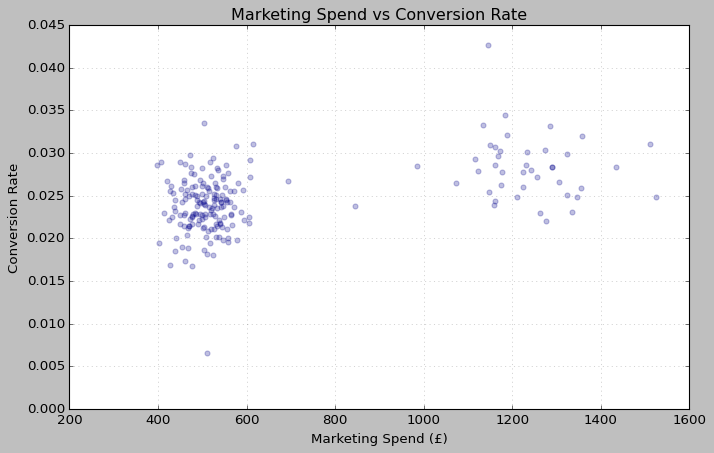

In [10]:
plt.figure(figsize=(10, 6))

plt.scatter(
    df['marketing_spend'], 
    df['conversion_rate'], 
    alpha=.25, 
    color='darkblue')

plt.xlabel("Marketing Spend (£)")
plt.ylabel("Conversion Rate")
plt.title("Marketing Spend vs Conversion Rate")

plt.grid(True, alpha=0.3)

plt.show()

### Example 3: Daily revenue

Let's now examine the distribution of our daily revenue:

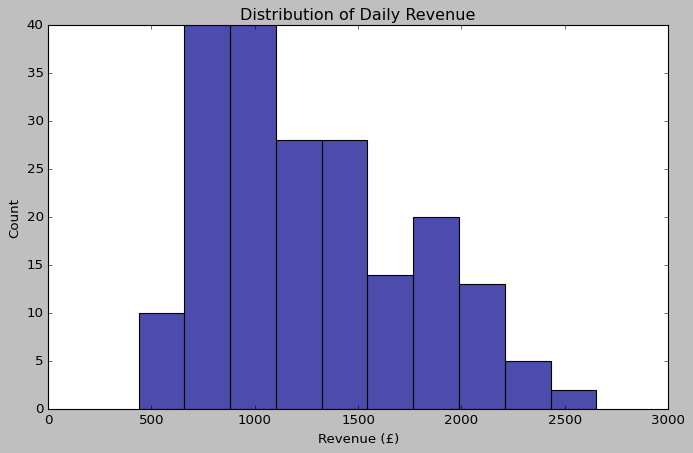

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df['revenue'],
    bins=10,
    color='darkblue',
    alpha=0.7)

plt.title("Distribution of Daily Revenue")
plt.xlabel("Revenue (£)")

plt.show()

### Example 4: Examining customer satisfaction

Let's create a box plot to understand how satisfaction scores vary with different revenue levels:

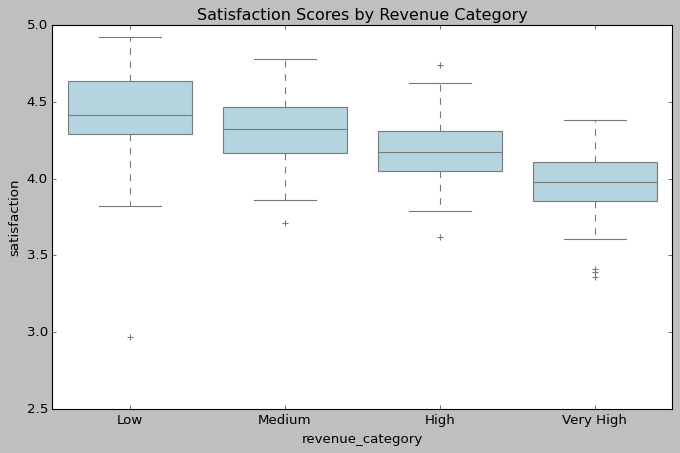

In [12]:
# Create revenue categories
df['revenue_category'] = pd.qcut(
    df['revenue'], 
    q=4, 
    labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(10, 6))

sns.boxplot(
    x="revenue_category", 
    y="satisfaction", 
    data=df, 
    color='lightblue')

plt.title("Satisfaction Scores by Revenue Category")

plt.show()

## Customising plot appearance

### Example 5: Adjust title, labels, etc.

Matplotlib provides extensive options for customizing plots. Let's look at various ways to adjust the format of our graphs:

In [ ]:
# Create a figure and axis with specific size
plt.figure(figsize=(12, 6))

# Plot the data
plt.plot(
    df.index, df['visitors'], 
    color='darkblue',         # Line color
    # linestyle="--",           # Dashed line
    linewidth=1,              # Line thickness
    alpha=0.7,                # Transparency
    label="Daily Visitors")   # Label for legend

# Customize the title
plt.title(
    "Website Traffic Over Time", 
    fontsize=16,            # Title size
    pad=20)                 # Padding above title

# Customize axes
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Visitors", fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add gridlines
plt.grid(True, linestyle=':', alpha=0.6)

# Add legend
plt.legend(fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

### Example 6: Subplots

We can also create subplots to compare different metrics side by side:

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# First subplot - Revenue over time
ax1.plot(
    df.index, df['revenue'], 
    color="darkgreen", 
    linewidth=2)
ax1.set_title("Daily Revenue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Revenue (£)")
ax1.tick_params(axis='x', rotation=45)

# Second subplot - Marketing spend over time
ax2.plot(
    df.index, df['marketing_spend'], 
    color='darkred', 
    linewidth=2)
ax2.set_title("Marketing Spend")
ax2.set_xlabel("Date")
ax2.set_ylabel("Spend (£)")
ax2.tick_params(axis='x', rotation=45)

# Add a main title to the figure
fig.suptitle(
    "Revenue and Marketing Spend Comparison", 
    fontsize=16, 
    y=1.05)

# Adjust the layout
plt.tight_layout()

plt.show()

### Some formatting options for subplots

#### Figure and plot size

- `figsize`: Set the width and height of the figure
- `tight_layout()`: Automatically adjust spacing
   
#### Lines and colours

- `colour`: Set the colour of lines or points
- `linestyle`: Choose line style _(solid, dashed, dotted)_
- `linewidth`: Set the thickness of lines
- `alpha`: Adjust transparency
   
#### Text elements

- `fontsize`: Set the size of text elements
- `rotation`: Rotate axis labels
- `label`: Add legend labels
   
#### Layout

- `grid`: Add or remove gridlines
- `subplot`: Create multiple plots in one figure
- `suptitle`: Add an overall title to multiple subplots

Remember that these customizations should serve a purpose - either to highlight important information or to make the visualisation more readable.

***
## 📚 SUPPLEMENTARY CONTENT (Best Practices)

**Estimated time**: 10-15 minutes

This section provides guidelines for creating effective and professional visualisations.

***

## Data visualisation: Best practices and some tips, too!

When creating visualisations, remember:

### Choose the right plot type

- Line plots for time series
- Scatter plots for relationships
- Bar plots for comparisons
- Histograms for distributions

### Consider your audience

- Use clear titles and labels
- Add explanatory notes when needed
- Keep the design clean and simple

### Pay attention to details

- Proper axis labels
- Appropriate colour schemes
- Consistent formatting